In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
from data_path import data_path
dataPath = data_path.dataPath

csv = pd.read_csv(dataPath + "train_events.csv")
labels = csv[csv["event"] == "onset"]
labels = labels.reset_index()

numSteps = (24 * 60 * 60) // 5
print(labels)

      index     series_id  night  event      step                 timestamp
0         0  038441c925bb      1  onset    4992.0  2018-08-14T22:26:00-0400
1         2  038441c925bb      2  onset   20244.0  2018-08-15T19:37:00-0400
2         4  038441c925bb      3  onset   39996.0  2018-08-16T23:03:00-0400
3         6  038441c925bb      4  onset   57240.0  2018-08-17T23:00:00-0400
4         8  038441c925bb      5  onset       NaN                       NaN
...     ...           ...    ...    ...       ...                       ...
7249  14498  fe90110788d2     31  onset  522852.0  2017-09-03T23:41:00-0400
7250  14500  fe90110788d2     32  onset  538956.0  2017-09-04T22:03:00-0400
7251  14502  fe90110788d2     33  onset  556560.0  2017-09-05T22:30:00-0400
7252  14504  fe90110788d2     34  onset  574620.0  2017-09-06T23:35:00-0400
7253  14506  fe90110788d2     35  onset       NaN                       NaN

[7254 rows x 6 columns]


In [25]:
def getTimesList():
    lst = []
    for hour in range(24):
        for minute in range(60):
            for second in range(0, 60, 5):
                time = f'{hour:02}:{minute:02}:{second:02}'
                lst.append(time)
    return lst

In [26]:
times = getTimesList()
frequencies = []

for i in range(len(times)):
    frequencies.append(len(labels[labels['timestamp'].str.contains(times[i]) == True]))

In [27]:
dict = {}

frequenciesNew = []
for i in range(len(frequencies) // 300):
    s = sum(frequencies[i * 300 : (i + 1) * 300])
    time = times[i * 300 + 150]
    dict[time] = s

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, '00:12:30'),
  Text(1, 0, '00:37:30'),
  Text(2, 0, '01:02:30'),
  Text(3, 0, '01:27:30'),
  Text(4, 0, '01:52:30'),
  Text(5, 0, '02:17:30'),
  Text(6, 0, '02:42:30'),
  Text(7, 0, '03:07:30'),
  Text(8, 0, '03:32:30'),
  Text(9, 0, '03:57:30'),
  Text(10, 0, '04:22:30'),
  Text(11, 0, '04:47:30'),
  Text(12, 0, '05:12:30'),
  Text(13, 0, '05:37:30'),
  Text(14, 0, '06:02:30'),
  Text(15, 0, '06:27:30'),
  Text(16, 0, '06:52:30'),
  Text(17, 0, '07:17:30'),
  Text(18, 0, '07:42:30'),
  Text(19, 0, '08:07:30'),
  Text(20, 0, '08:32:30'),
  Text(21, 0, '08:57:30'),
  Text(22, 0, '09:22:30'),
  Text(23, 0, '09:47:30'),
  Text(24, 0, '10:12:30'),
  

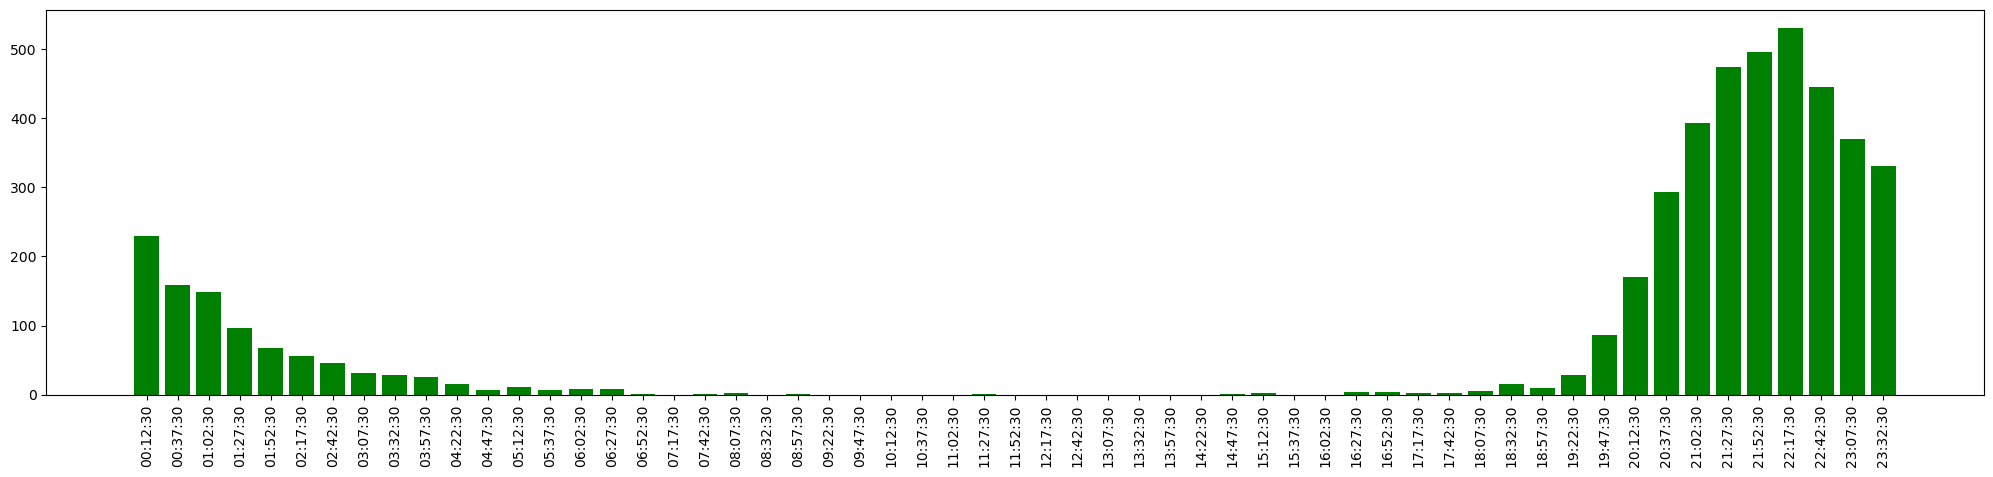

In [28]:
plt.figure(figsize=(25, 5))
plt.bar(dict.keys(), dict.values(), color='g')
plt.xticks(rotation='vertical')